In [1]:
import numpy as np
import matplotlib.pylab as plt
from numpy.fft import fft, ifft
#import seaborn as sns
import matplotlib as mpl

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['text.usetex'] = True  # for using Times New Roman fonts
plt.rc('text.latex', preamble=r'\usepackage{amsmath,dsfont}')  #to import latex package
#mpl.style.use('default')  #for 'seaborn' style or 'default'

In [2]:
#loading data --> Np=\eta

#Seri1 0.1<Np<1
D71E=np.loadtxt('NE_NpSeri1_TI7.txt')
D71I=np.loadtxt('NI_NpSeri1_TI7.txt')
D41=D71E+D71I

#Seri2 0.01<Np<0.1
D72E=np.loadtxt('NE_NpSeri2_TI7.txt')
D72I=np.loadtxt('NI_NpSeri2_TI7.txt')
D42=np.delete(D72E,9,0)+np.delete(D72I,9,0)

#Seri3 0.001<Np<0.01
D73E=np.loadtxt('NE_NpSeri3_TI7.txt')
D73I=np.loadtxt('NI_NpSeri3_TI7.txt')
D43=D73E+D73I

#Seri4 0.0001<Np<0.001
D74E=np.loadtxt('NE_NpSeri4_TI7.txt')
D74I=np.loadtxt('NI_NpSeri4_TI7.txt')
D44=D74E+D74I

#Seri5 0.00001<Np<0.0001
D75E=np.loadtxt('NE_NpSeri5_TI7.txt')
D75I=np.loadtxt('NI_NpSeri5_TI7.txt')
D45=D75E+D75I

In [3]:
#final matrix to send for fft (Mat4)
p1=np.concatenate( ( np.delete(D45,0,1),np.delete(D44,0,1) ), axis=0)
p2=np.concatenate( ( p1,np.delete(D43,0,1) ), axis=0)
p3=np.concatenate( ( p2,np.delete(D42,0,1) ), axis=0)
Mat4=np.concatenate( ( p3,np.delete(D41,0,1) ), axis=0)

Text(0, 0.5, '$\\rho$')

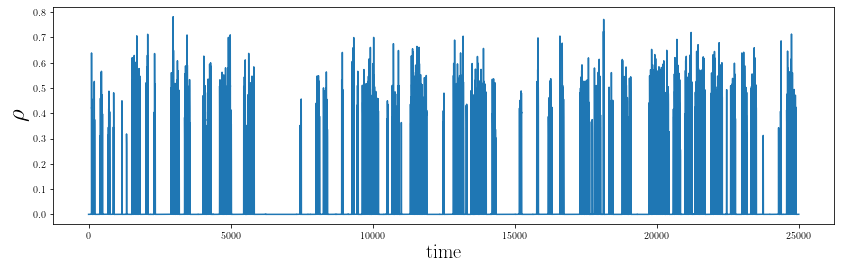

In [4]:
# Plot for a single data within intermittent state

row=5
rho=Mat4[row]
time=np.arange(len(rho))

plt.figure(figsize=(14, 4))
plt.plot(time,rho)
plt.xlabel('time',fontsize=20)
plt.ylabel(r'$\rho$',fontsize=25)

(0.0, 0.2)

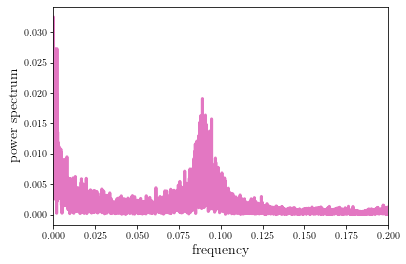

In [5]:
from numpy.fft import fft, ifft

L=len(time)
Fs = 1  #sampling frequency
Y=fft(rho)    
P2 = np.abs(Y/L)
P1 = P2[0:int(L/2)+1]
end=len(P1)-1
P1[1:end] = 2*P1[1:end]
x=np.arange(0,(int(L/2)+1))
f = Fs*x/L

frequency=f[1:-2]
power=P1[1:-2]

plt.plot(frequency,power, color='C6', lw=3)
plt.xlabel('frequency',fontsize=14, rotation=0)
plt.ylabel('power spectrum',fontsize=14, rotation=90)
plt.xlim(0,.2)
#plt.ylim(0,.01)

(13250.0, 14400.0)

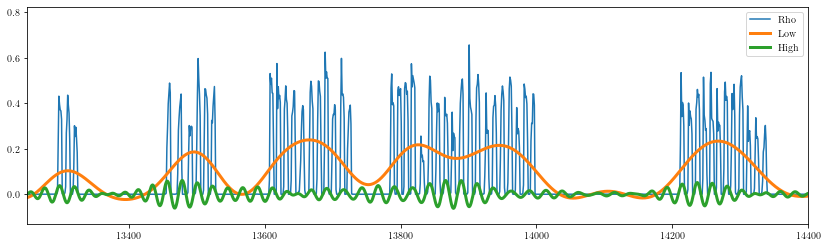

In [6]:
from scipy import signal                        
n = 505                            

f1, f2 = 0.000001, 0.02
b = signal.firwin(n, [f1, f2], width=None, pass_zero=False, window='hamming')
Vlo = signal.filtfilt(b, 1, rho)   

f1, f2 = 0.075, 0.105
bb=signal.firwin(n, [f1, f2],width=None, pass_zero=False, window='hamming')
Vhi=signal.filtfilt(bb, 1, rho)

plt.figure(figsize=(14, 4))
plt.plot(time,rho, label="Rho")
plt.plot(time,Vlo, lw=3, label="Low")
plt.plot(time,Vhi, lw=3, label="High")
plt.legend()
plt.xlim(13250,14400)

Text(0, 0.5, 'High-frequency amplitude')

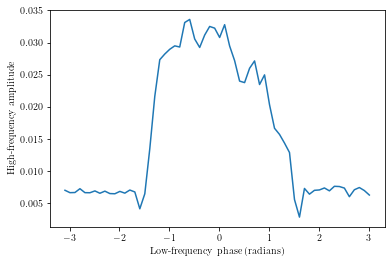

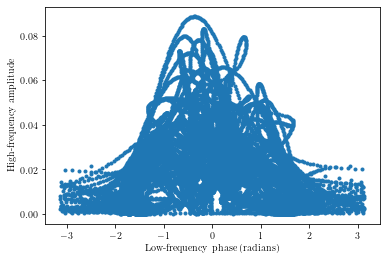

In [7]:
#  plotting the average amplitude versus phase

amp = np.abs(signal.hilbert(Vhi))          # Compute amplitude of high-freq signal
phi = np.angle(signal.hilbert(Vlo))        # Compute phase of low-freq signal

p_bins = np.arange(-np.pi, np.pi, 0.1)
a_mean = np.zeros(np.size(p_bins)-1)
p_mean = np.zeros(np.size(p_bins)-1)
for k in range(np.size(p_bins)-1):     #For each phase bin,
    pL = p_bins[k]                  #... lower phase limit,
    pR = p_bins[k+1]                #... upper phase limit.
    indices=(phi>=pL) & (phi<pR)    #Find phases falling in bin,
    a_mean[k] = np.mean(amp[indices])  #... compute mean amplitude,
    p_mean[k] = np.mean([pL, pR])      #... save center phase.
plt.plot(p_mean, a_mean)                #Plot the phase versus amplitude,
plt.ylabel('High-frequency amplitude')  #... with axes labeled.
plt.xlabel('Low-frequency phase (radians)')

# The plot shows the phase bins versus the mean amplitude in each bin. 
# Visual inspection of this phase-amplitude plot suggests that the amplitude of 
# the high-frequency signal depends on the phase of the low-frequency signal. 
# In particular, we note that when the phase is between values -1.8 and 1.8 radians, 
# the amplitude tends to be large, while at other phases the amplitude is smaller. 
# This conclusion suggests that CFC does occur in the data; the high-frequency amplitude 
# depends on the low-frequency phase.

plt.figure()
plt.plot(phi,amp, '.')
plt.xlabel('Low-frequency phase (radians)')
plt.ylabel('High-frequency amplitude')
#print(phi)

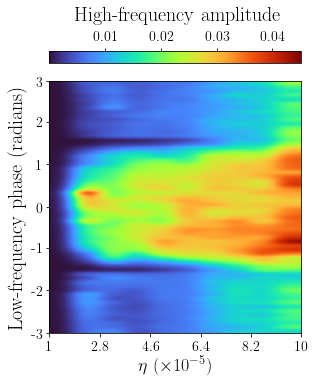

In [8]:
# Plot for the whole intermmitent phase
last=10

colormap='turbo'  

from scipy import signal                        
n = 505                            

low_fre_phase=[]
for row in np.arange(last):
    Rho=Mat4[row]
    f1, f2 = 0.000001, 0.02
    b = signal.firwin(n, [f1, f2], width=None, pass_zero=False, window='hamming')
    low = signal.filtfilt(b, 1, Rho)   
    f1, f2 = 0.075, 0.105
    bb=signal.firwin(n, [f1, f2],width=None, pass_zero=False, window='hamming')
    high=signal.filtfilt(bb, 1, Rho)
    amp = np.abs(signal.hilbert(high))         
    phi = np.angle(signal.hilbert(low))  
    p_bins = np.arange(-np.pi, np.pi, 0.1)
    a_mean = np.zeros(np.size(p_bins)-1)
    p_mean = np.zeros(np.size(p_bins)-1)
    for k in range(np.size(p_bins)-1):    
        pL = p_bins[k]                 
        pR = p_bins[k+1]               
        indices=(phi>=pL) & (phi<pR)    
        a_mean[k] = np.mean(amp[indices]) 
        p_mean[k] = np.mean([pL, pR])
    low_fre_phase.append(a_mean)

low_fre_phase=np.rot90(low_fre_phase)
low_fre_phase=np.flipud(low_fre_phase)
    
    
fig, ax = plt.subplots(figsize=(5,5.5))
im=[]
im=plt.imshow(low_fre_phase, cmap=colormap, interpolation = "gaussian", extent=[0,1,0,1], origin='lower') # vmin=0, vmax=0.005,

cbar = plt.colorbar(location='top')
for t in cbar.ax.get_xticklabels():
     t.set_fontsize(14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$\eta ~ (\times 10^{-5}) $', fontsize=18)
plt.ylabel('Low-frequency phase (radians)', fontsize=20)
ax.set_yticks([0, 0.17, 0.34, .5, 0.67, 0.84, 1])
ax.set_yticklabels(['-3', '-2', '-1', '0', '1', '2', '3'])
#plt.setp( ax.get_yticklabels(), visible=False)
ax.set_xticks([0, .2, .4, .6, .8, 1])
ax.set_xticklabels(['1', '2.8', '4.6', '6.4', '8.2', '10'])

plt.figtext(.22, 0.95, 'High-frequency amplitude', fontsize=20, fontweight='bold')
#fig.subplots_adjust(right=1)

plt.subplots_adjust(top=0.98, bottom=0.06, left=0.15, right=0.85)